In [100]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [101]:
# Load dataset into a dataframe
data = pd.read_csv("./data/scrapped/morrissons_listings.csv")
data.head()

,wine_type,size (cL),name,price,rating,num_review,country,abv,year,url
0,white,75.0,McGuigan Black Label Shiraz,6.75,3.6,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...
1,white,75.0,Morrisons The Best Touraine Rose,8.00,3.0,4,France,12.5,NaN,https://groceries.morrisons.com/products/morri...
2,white,75.0,McGuigan Black Label Merlot,6.75,4.2,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...
3,white,75.0,Morrisons The Best South African Sauvignon Blanc,7.50,4.0,9,Western Cape,12.5,2021,https://groceries.morrisons.com/products/morri...
4,white,75.0,Hardys Nottage Hill Chardonnay,6.75,3.4,5,Australia,13.5,2017,https://groceries.morrisons.com/products/hardy...


In [102]:
# IMPLEMENT THE FIX
# Rename the column name for convenience
data.rename(columns={"size (cL)" : "size"}, inplace=True)

In [103]:
# Check types of all variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wine_type   518 non-null    object 
 1   size        518 non-null    float64
 2   name        518 non-null    object 
 3   price       518 non-null    float64
 4   rating      518 non-null    float64
 5   num_review  518 non-null    int64  
 6   country     496 non-null    object 
 7   abv         509 non-null    float64
 8   year        416 non-null    object 
 9   url         518 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 40.6+ KB


In [104]:
# Count NA values
data.isna().sum()

wine_type       0
size            0
name            0
price           0
rating          0
num_review      0
country        22
abv             9
year          102
url             0
dtype: int64

In [105]:
# Check number of unique values in all columns
data.nunique()

wine_type       5
size            9
name          490
price          81
rating         35
num_review     29
country        32
abv            28
year           13
url           501
dtype: int64

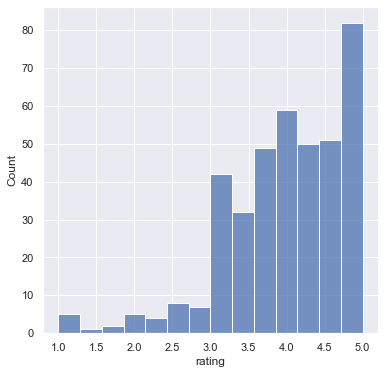

In [106]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0')["rating"])
plt.show()

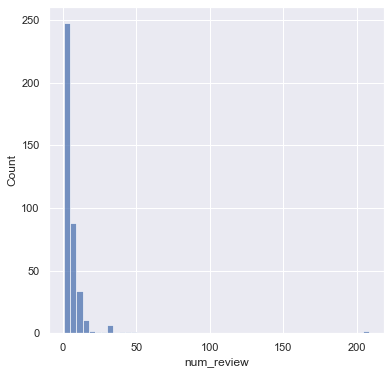

In [107]:
# Histogram plots for number of reviews. There are some extreme values at the end
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0')["num_review"], kde=False, bins=50)
plt.show()

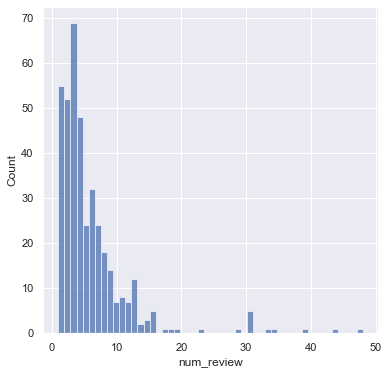

In [108]:
# Histogram plots for number of reviews, without the extreme values. Still very skewed
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0 and num_review < 50')["num_review"], kde=False, bins=50)
plt.show()

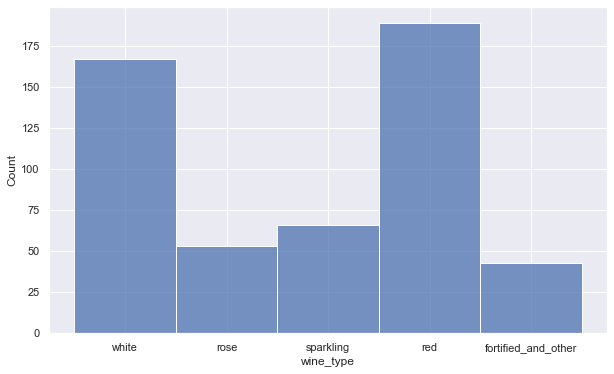

In [109]:
# Histogram plots for wine type
sns.set(rc={"figure.figsize":(10,6)})
sns.histplot(data["wine_type"])
plt.show()

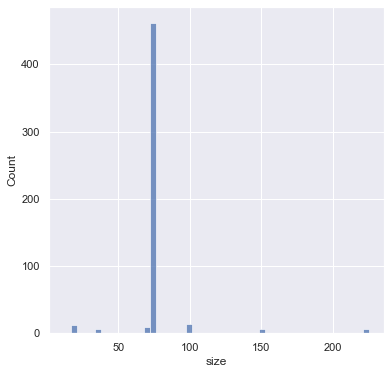

In [110]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data["size"], kde=False, bins=50)
plt.show()

In [111]:
# Number of bottles by size. Most are 75 cl.
data.groupby('size').size()

size
12.5       1
18.7      10
20.0       3
37.5       6
70.0       9
75.0     462
100.0     14
150.0      6
225.0      7
dtype: int64

In [112]:
# IMPLEMENT THE FIX
# Fix missing countries to unknown value
data["country"].fillna("unknown" , inplace=True)
data["country"].unique()

array(['Australia', 'France', 'Western Cape', 'New Zealand', 'Italy',
       'Chile', 'South Africa', 'Hungary', 'unknown', 'Spain',
       'California', 'Produce of the EU', 'United States', 'Austria',
       'Portugal', 'Western Australia', 'Germany', 'Argentina', 'U',
       'Marlborough', 'British', 'Bulgaria', 'United Kingdom', 'England',
       'Moldova (Republic Of)', 'USA', 'Valle Central', 'Bordeaux',
       'Greece', 'Cahors', 'Scotland', ': Portugal',
       'the Island of Madeira'], dtype=object)

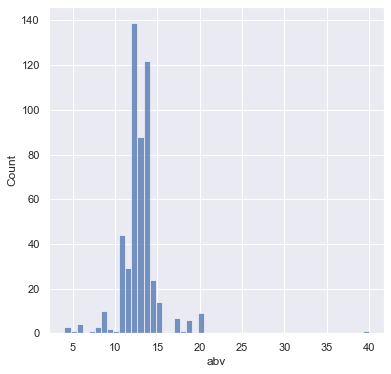

In [113]:
# Histogram plot of ABV
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data["abv"], kde=False,bins=50)
plt.show()

In [114]:
# Compute % of missing values
print('Missing pct', data["abv"].isna().sum()/len(data["abv"])*100)

Missing pct 1.7374517374517375


In [115]:
# As the % of missing values is very small, we will drop the rows having abv value as NA
data.dropna(subset = ["abv"], inplace=True)

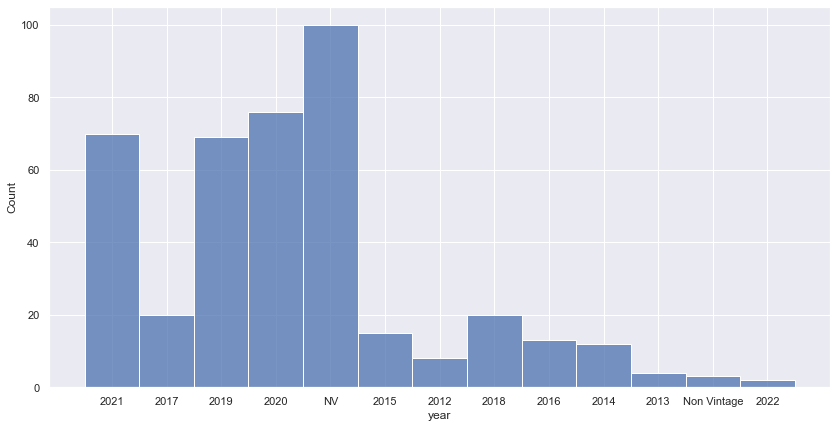

In [116]:
# Histogram plot of year
sns.set(rc={"figure.figsize":(14,7)})
sns.histplot(data["year"], bins=30)
plt.show()

In [117]:
# The missing pct is >20%. We need to see if there's any pattern
print('Missing pct', data["year"].isna().sum()/len(data["year"])*100)

Missing pct 19.05697445972495


In [118]:
data['missing_year'] = data['year'].isnull()
data['price_bucket'] = pd.qcut(data['price'], 10)

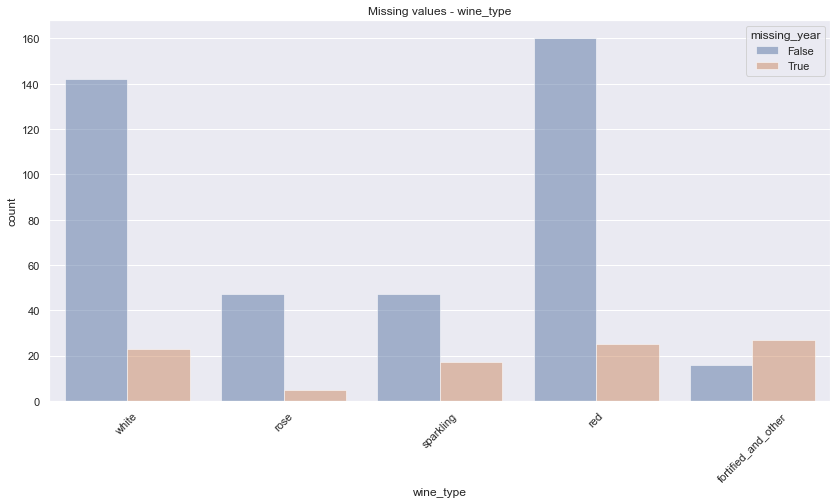

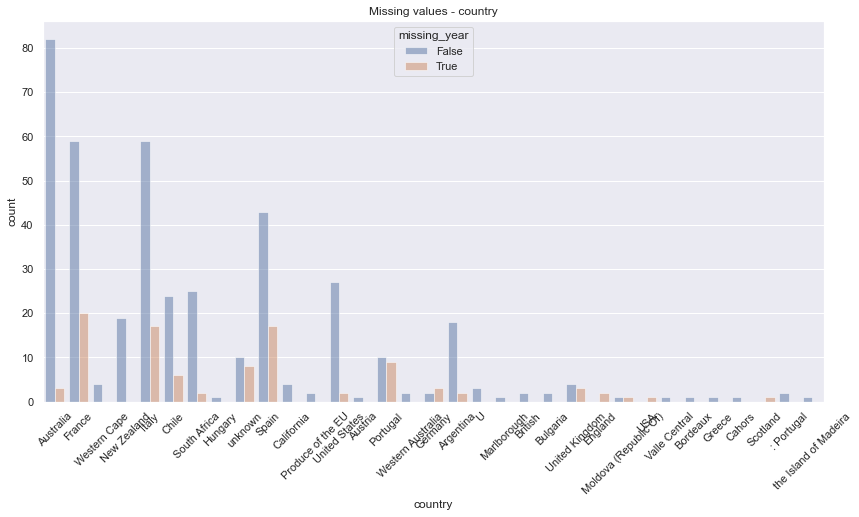

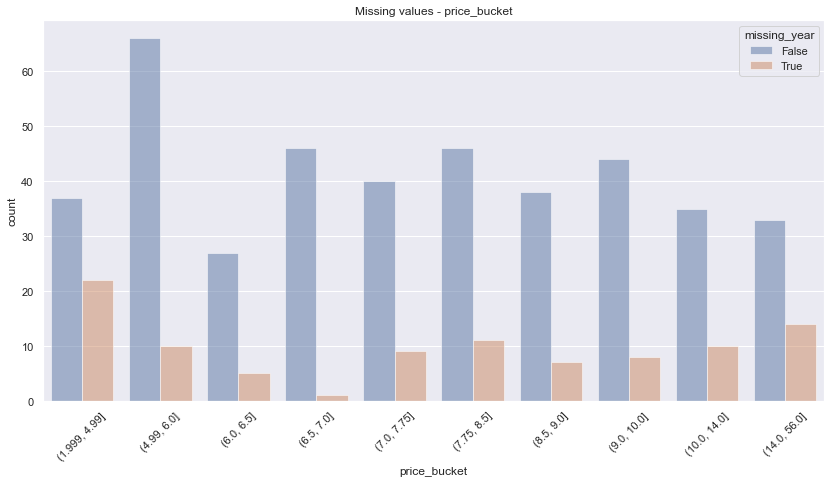

In [119]:
# Histogram plot of year
for col in ['wine_type', 'country', 'price_bucket']:
    fig, axs = plt.subplots(figsize=(14, 7))
    # sns.histplot(data.query('not missing_year')['wine_type'], bins=30, ax=axs, alpha=.5)
    # sns.histplot(data.query('missing_year')['wine_type'], bins=30, ax=axs, alpha=.5, color='red')
    sns.countplot(data=data, x=col, ax=axs, alpha=.5, hue='missing_year')
    axs.set_title(f'Missing values - {col}')
    plt.xticks(rotation=45)
    plt.show()

In [137]:
# Feature Engineering
data = data.reset_index(drop=True)

def get_age(year):
    try:
        return 2022 - int(year)
    except:
        return None

# Find age
data.loc[:, "age"] = data['year'].apply(get_age)

# Creating a column with ratings >5
for i, num in enumerate(data["num_review"]):
    if num > 5:
        data.loc[i, "score"] = data.loc[i, "rating"]
    else:
        data.loc[i, "score"] = 0


In [121]:
# Impute size to most frequent value
# That is 75cl which is reasonable
impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data[["size"]]=impute.fit_transform(data[["size"]])

# To scale size --> Price per cl
for i, size in enumerate(data["size"]):
    data.loc[i, "scaledprice"] = data.loc[i, "price"] * 75 / size

# Creating a new column log price as it is skewed
# Doesn't make sense
data.loc[:, "logprice"] = np.log10(data.loc[:,"scaledprice"])


In [122]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

data["countrycode"] = [countries.get(c, "unknown") for c in data["country"]]
data.head()

,wine_type,size,name,price,rating,num_review,country,abv,year,url,missing_year,price_bucket,scaledprice,logprice,countrycode
0,white,75.0,McGuigan Black Label Shiraz,6.75,3.6,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,False,"(6.5, 7.0]",6.75,0.829304,AUS
1,white,75.0,Morrisons The Best Touraine Rose,8.00,3.0,4,France,12.5,NaN,https://groceries.morrisons.com/products/morri...,True,"(7.75, 8.5]",8.00,0.903090,FRA
2,white,75.0,McGuigan Black Label Merlot,6.75,4.2,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,False,"(6.5, 7.0]",6.75,0.829304,AUS
3,white,75.0,Morrisons The Best South African Sauvignon Blanc,7.50,4.0,9,Western Cape,12.5,2021,https://groceries.morrisons.com/products/morri...,False,"(7.0, 7.75]",7.50,0.875061,unknown
4,white,75.0,Hardys Nottage Hill Chardonnay,6.75,3.4,5,Australia,13.5,2017,https://groceries.morrisons.com/products/hardy...,False,"(6.5, 7.0]",6.75,0.829304,AUS


<AxesSubplot:>

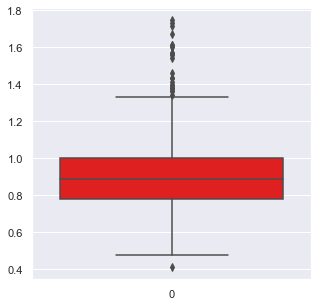

In [123]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(5,5)})

sns.boxplot(data=np.log10(data["scaledprice"]), color= "red")


<AxesSubplot:>

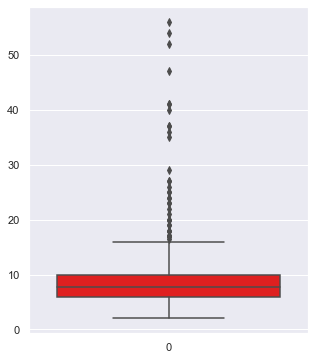

In [124]:
price_dropna = pd.to_numeric(data["price"], errors='coerce')

# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 20000], color= "red")

<AxesSubplot:>

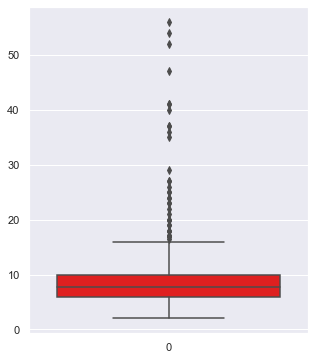

In [125]:
# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 100], color= "red")


<AxesSubplot:xlabel='Count', ylabel='country'>

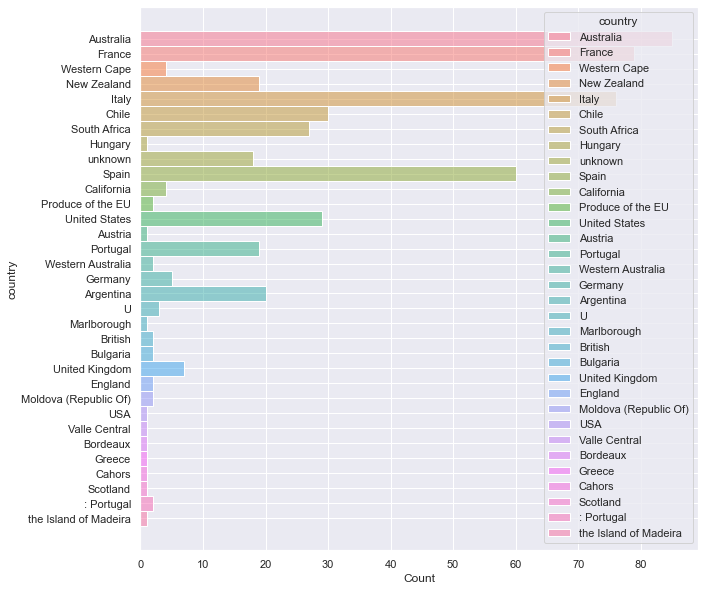

In [126]:
# Countries visualisation
# BREAK DOWN BY WINE TYPE
sns.set(rc={"figure.figsize":(10,10)})
sns.histplot(data=data, y="country", hue="country")

<AxesSubplot:xlabel='wine_type', ylabel='price_fixed'>

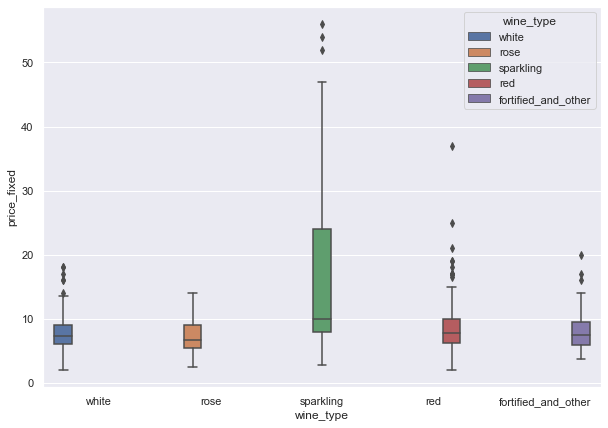

In [127]:
# plot wine type vs abs price
data['price_fixed'] = pd.to_numeric(data['price'], errors='coerce')


sns.set(rc={"figure.figsize":(10,7)})

sns.boxplot(
    data=data.query('price_fixed < 100'),
    x="wine_type", y="price_fixed", hue="wine_type"
)

<AxesSubplot:xlabel='wine_type', ylabel='logprice'>

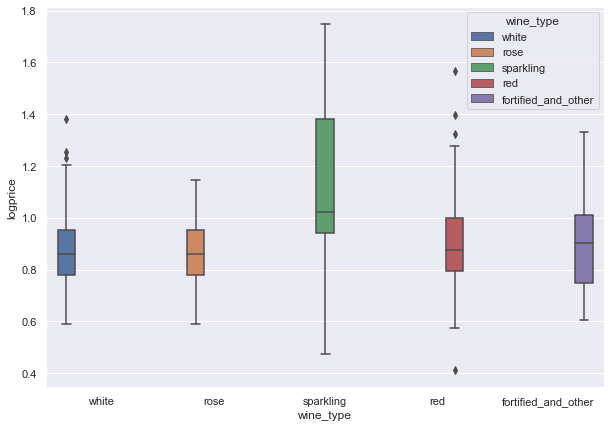

In [128]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(10,7)})

sns.boxplot(
    data=data,
    x="wine_type", y="logprice", hue="wine_type"
)

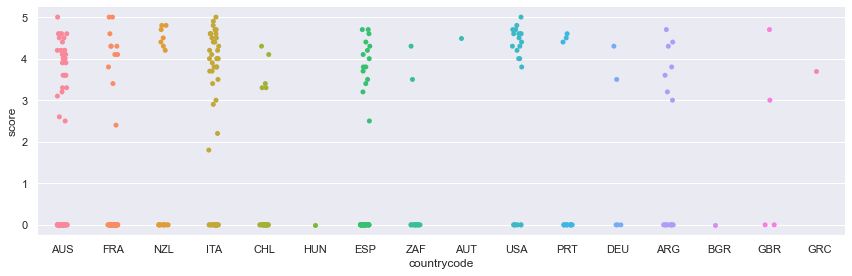

In [131]:
# plot country vs review ratings
sns.catplot(
    data=data.query('num_review > 0').loc[data["countrycode"]!="unknown"], 
    x="countrycode", 
    y="score", 
    height=4, 
    aspect=3,
)

<AxesSubplot:xlabel='age', ylabel='logprice'>

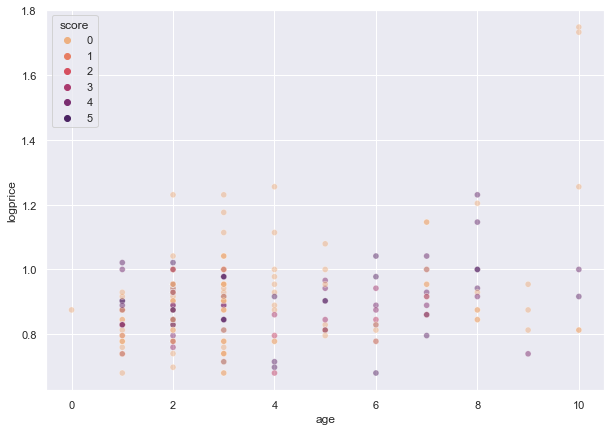

In [138]:
sns.scatterplot(
    data=data.query('num_review > 0'), 
    hue='score', 
    x='age', 
    y='logprice', 
    alpha=.5, 
    palette='flare',
)

Text(0.5, 0, 'LogPrice')

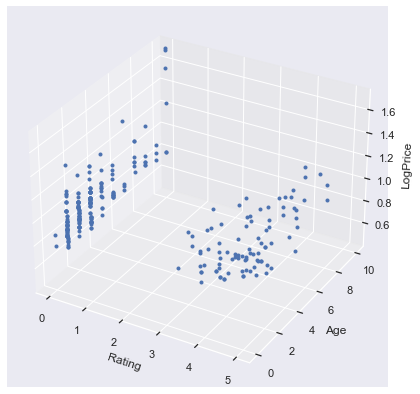

In [140]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(data["score"], data["age"], data["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")

In [141]:
# Plot top 5 frequent years
topyear=data.loc[:, "year"].value_counts().sort_values(ascending=False)
top=topyear.iloc[0:5]
topy =pd.DataFrame({'year':top.index, 'count':top.values})
topy


,year,count
0,NV,100
1,2020,76
2,2021,70
3,2019,69
4,2017,20


<AxesSubplot:xlabel='year', ylabel='count'>

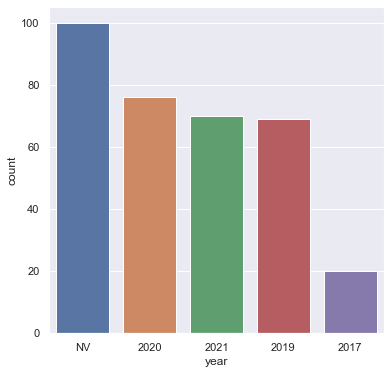

In [142]:
sns.set(rc={"figure.figsize":(6,6)})
sns.barplot(data=topy, x= "year", y = "count")



In [143]:
# Rename the column name for convenience
data.rename(columns={"size" : "size(cL)", "scaledprice" : "scaled_price" }, inplace=True)
data

,wine_type,size(cL),name,price,rating,num_review,country,abv,year,url,missing_year,price_bucket,scaled_price,logprice,countrycode,price_fixed,age,score
0,white,75.0,McGuigan Black Label Shiraz,6.75,3.6,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,False,"(6.5, 7.0]",6.750000,0.829304,AUS,6.75,1.0,3.6
1,white,75.0,Morrisons The Best Touraine Rose,8.00,3.0,4,France,12.5,NaN,https://groceries.morrisons.com/products/morri...,True,"(7.75, 8.5]",8.000000,0.903090,FRA,8.00,NaN,0.0
2,white,75.0,McGuigan Black Label Merlot,6.75,4.2,13,Australia,12.5,2021,https://groceries.morrisons.com/products/mcgui...,False,"(6.5, 7.0]",6.750000,0.829304,AUS,6.75,1.0,4.2
3,white,75.0,Morrisons The Best South African Sauvignon Blanc,7.50,4.0,9,Western Cape,12.5,2021,https://groceries.morrisons.com/products/morri...,False,"(7.0, 7.75]",7.500000,0.875061,unknown,7.50,1.0,4.0
4,white,75.0,Hardys Nottage Hill Chardonnay,6.75,3.4,5,Australia,13.5,2017,https://groceries.morrisons.com/products/hardy...,False,"(6.5, 7.0]",6.750000,0.829304,AUS,6.75,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,fortified_and_other,75.0,Cornish Blackberry Mead,8.75,3.0,6,United Kingdom,17.0,NV,https://groceries.morrisons.com/products/corni...,False,"(8.5, 9.0]",8.750000,0.942008,GBR,8.75,NaN,3.0
505,fortified_and_other,70.0,Sanatogen Original Tonic Wine,5.75,4.5,2,unknown,15.0,NV,https://groceries.morrisons.com/products/sanat...,False,"(4.99, 6.0]",6.160714,0.789631,unknown,5.75,NaN,0.0
506,fortified_and_other,75.0,Gonzalez Byass Tio Pepe Fino,11.00,0.0,0,Spain,15.0,NV,https://groceries.morrisons.com/products/gonza...,False,"(10.0, 14.0]",11.000000,1.041393,ESP,11.00,NaN,0.0
507,fortified_and_other,75.0,Taylor's Late Bottled Vintage Port,16.00,3.7,3,Portugal,20.0,2014,https://groceries.morrisons.com/products/taylo...,False,"(14.0, 56.0]",16.000000,1.204120,PRT,16.00,8.0,0.0


In [145]:
data.drop(['missing_year', 'price_bucket'], axis=1).to_csv("./data/ready to merge/morrissons_to_merge.csv", index=False)